In [1]:
%matplotlib inline
from sqlalchemy import create_engine, and_
from sqlalchemy.orm import sessionmaker
from DB_Setup import Base, FullMarketDailyTrade, SingleStockDaily
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np

In [2]:
engine = create_engine('sqlite:///taiwanstock.db')
# Bind the engine to the metadata of the Base class so that the
# declaratives can be accessed through a DBSession instance
Base.metadata.bind = engine
DBSession = sessionmaker(bind=engine)
# A DBSession() instance establishes all conversations with the database
# and represents a "staging zone" for all the objects loaded into the
# database session object. Any change made against the objects in the
# session won't be persisted into the database until you call
# session.commit(). If you're not happy about the changes, you can
# revert all of them back to the last commit by calling
# session.rollback()
session = DBSession()

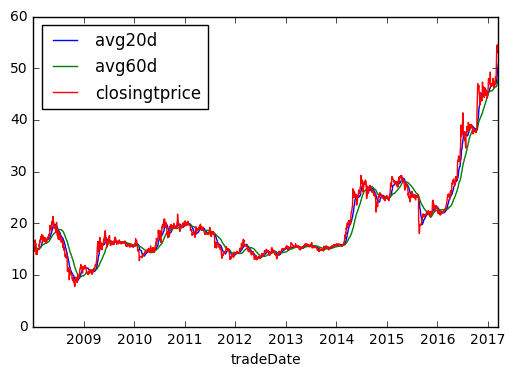

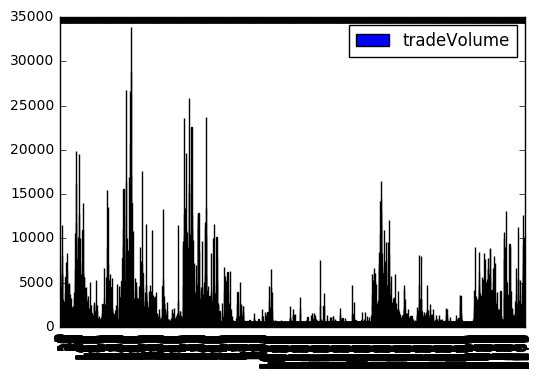

In [56]:
avg1 = 'avg20d'
avg2 = 'avg60d'

sd = SingleStockDaily
df = pd.read_sql(session.query(sd.openingprice,sd.closingtprice,sd.avg5d,sd.avg10d,sd.avg20d,sd.avg60d,sd.tradeDate,sd.tradeVolume)\
.order_by(sd.tradeDate).filter(sd.stockid=='1215').statement, session.bind)
df1 = df.copy()
df1.index = range(0,len(df1))
df1.plot(x='tradeDate',y=[avg1,avg2,'closingtprice'])
df1.plot(y=['tradeVolume'],kind='bar')

In [57]:
sd = SingleStockDaily
df = pd.read_sql(session.query(sd.openingprice,sd.closingtprice,sd.avg5d,sd.avg10d,sd.avg20d,sd.avg60d,sd.tradeDate,sd.tradeVolume)\
.order_by(sd.tradeDate).filter(sd.stockid=='1215').statement, session.bind)
df['pricediff'] = np.nan
for i in range(len(df)-1,0,-1):
    #print(df.loc[i]['pricediff'])
    df.loc[i-1, 'pricediff']=df.loc[i, 'closingtprice']-df.loc[i-1, 'closingtprice']

In [58]:
df['openclose'] = df['closingtprice'] - df['openingprice']

In [86]:
param1 = 'openclose'
param2 = 'tradeVolume'
up_param1 = list()
up_param2 = list()
down_param1 = list()
down_param2 = list()
for i in range(len(df)): 
    diff = df.loc[i, 'pricediff']
    if  diff >= 0:
        up_param1.append(df.loc[i, param1])
        up_param2.append(df.loc[i, param2])
    elif diff < 0:
        down_param1.append(df.loc[i, param1])
        down_param2.append(df.loc[i, param2])
    else:
        continue

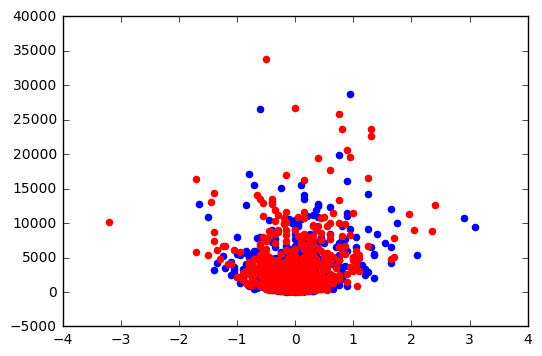

In [87]:
plt.scatter(up_param1, up_param2, color = "b", label="up")
plt.scatter(down_param1, down_param2, color = "r", label="down")